# Demo of bmtool chemical synaptic tuner using BMTK network
by Gregory Glickert

For a bit more context in using the tuner you can check out the notebook called neuron_chem_syn_tuner which goes over more details about using the tuner with pure NEURON models.

When running this tuner you will see some warnings. That is on purpose, some of the synapses in this bmtk testing network do not have the Dep, Fac or Use parameters. That is ok and the tuner will still work for those synapses, but you can't tune those parameteres since they dont exist in the mod file.



In [1]:
# like normal lets first compile mod files
import os

# if already compiled then lets delete the folder and force a recompile
if os.path.isdir('bmtk_files/components/mechanisms/x86_64'):
    os.system("rm -rf bmtk_files/components/mechanisms/x86_64")
if os.path.isdir('bmtk_files/components/mechanisms/arm64'):
    os.system("rm -rf bmtk_files/components/mechanisms/arm64")
# compile the mod files
if not os.path.isdir("bmtk_files/components/mechanisms/x86_64"):
    os.chdir('bmtk_files/components/mechanisms')
    os.system("nrnivmodl")
    os.chdir("../../..")

/usr/bin/xcrun


/Users/gregglickert/miniconda3/envs/bmtk/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
Translating k_rtm.mod into /Users/gregglickert/Documents/GitHub/bmtool/docs/examples/notebooks/synapses/synaptic_tuner/bmtk_files/components/mechanisms/arm64/k_rtm.c
Translating exp2syn_stsp.mod into /Users/gregglickert/Documents/GitHub/bmtool/docs/examples/notebooks/synapses/synaptic_tuner/bmtk_files/components/mechanisms/arm64/exp2syn_stsp.c
Translating exp2syn_stp.mod into /Users/gregglickert/Documents/GitHub/bmtool/docs/examples/notebooks/synapses/synaptic_tuner/bmtk_files/components/mechanisms/arm64/exp2syn_stp.c
Thread Safe
Thread Safe
Thread Safe
Translating k_wb.mod into /Users/gregglickert/Documents/GitHub/bmtool/docs/examples/notebooks/synapses/synaptic_tuner/bmtk_files/components/mechanisms/arm64/k_wb.c
Translating na_rtm.mod into /Users/gregglickert/Documents/

/Users/gregglickert/Documents/GitHub/bmtool/docs/examples/notebooks/synapses/synaptic_tuner/bmtk_files/components/mechanisms
Mod files: "./exp2syn_stp.mod" "./exp2syn_stsp.mod" "./k_rtm.mod" "./k_wb.mod" "./leak.mod" "./na_rtm.mod" "./na_wb.mod" "./vecevent.mod"

Creating 'arm64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../exp2syn_stp.mod
 -> NMODL ../exp2syn_stsp.mod
 -> NMODL ../k_rtm.mod
 -> NMODL ../k_wb.mod
 -> NMODL ../na_rtm.mod
 -> NMODL ../leak.mod
 -> NMODL ../na_wb.mod
 -> Compiling exp2syn_stp.c
 -> NMODL ../vecevent.mod
Notice: ARTIFICIAL_CELL is a synonym for POINT_PROCESS which hints that it
only affects and is affected by discrete events. As such it is not
located in a section and is not associated with an integrator
 -> Compiling exp2syn_stsp.c
 -> Compiling k_rtm.c
 -> Compiling k_wb.c


Thread Safe
Thread Safe
Translating na_wb.mod into /Users/gregglickert/Documents/GitHub/bmtool/docs/examples/notebooks/synapses/synaptic_tuner/bmtk_files/components/mechanisms/arm64/na_wb.c
Translating vecevent.mod into /Users/gregglickert/Documents/GitHub/bmtool/docs/examples/notebooks/synapses/synaptic_tuner/bmtk_files/components/mechanisms/arm64/vecevent.c
Thread Safe
Thread Safe
exp2syn_stp.c:42:18: warning: a function declaration without a prototype is deprecated in all versions of C and is treated as a zero-parameter prototype in C23, conflicting with a previous declaration [-Wdeprecated-non-prototype]
   42 |          extern double *getarg();
      |                         ^
/Users/gregglickert/miniconda3/envs/bmtk/lib/python3.11/site-packages/neuron/.data/include/hocdec.h:15:17: note: expanded from macro 'getarg'
   15 | #define getarg  hoc_getarg
      |                 ^
/Users/gregglickert/miniconda3/envs/bmtk/lib/python3.11/site-packages/neuron/.data/include/oc_ansi.h:49:1

 -> Compiling leak.c
 -> Compiling na_rtm.c
 -> Compiling na_wb.c
 -> Compiling vecevent.c
 => LINKING shared library ./libnrnmech.dylib
 => LINKING executable ./special LDFLAGS are:    
Successfully created arm64/special


ld: warning: ignoring duplicate libraries: '-lnrnmech'


## Load the synaptic tuner using a bmtk config

In [2]:
from bmtool.synapses import SynapseTuner

tuner = SynapseTuner(
    config='bmtk_files/simulation_config.json',  # Path to BMTK config
    current_name='i',                            # Synaptic current to record
    connection = 'Exc2SOM', 
    slider_vars=['initW','Dep','Fac','Use','tau1','tau2']  # Parameters for sliders
)


--No graphics will be displayed.


loading /Users/gregglickert/Documents/GitHub/bmtool/docs/examples/notebooks/synapses/synaptic_tuner/bmtk_files/components/templates/README.md
loading /Users/gregglickert/Documents/GitHub/bmtool/docs/examples/notebooks/synapses/synaptic_tuner/bmtk_files/components/templates/cell_templates.hoc
Building conn_type_settings from BMTK config files...
Found 8 connection types: ['Exc2PV', 'SOM2PV', 'PV2PV', 'Exc2SOM', 'Exc2Exc', 'PV2Exc', 'SOM2Exc', 'background_syn']


When using the tuner with multiple networks you can switch between your different bmtk networks to test every single connection in your network. Note the synaptic weight (sometimes called initW) is the bmtk netconn weight. If you are tuning a synapse for its strength make sure to keep this in mind. You should be able to convert that to a scale factor for you weight inside the mod file if needed

In [3]:
tuner.InteractiveTuner()

Output()

If using the optimizer with a bmtk network just make sure you specifiy which connection you want to use. You can switch it in the Interactive tuner or using the switch_connection method

## Switch a connection for the Opimizer 

In [4]:
tuner._switch_connection('PV2Exc')

Successfully switched to connection: PV2Exc


Now we tune that PV2Exc synapse

/Users/gregglickert/miniconda3/envs/bmtk/lib/python3.11/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


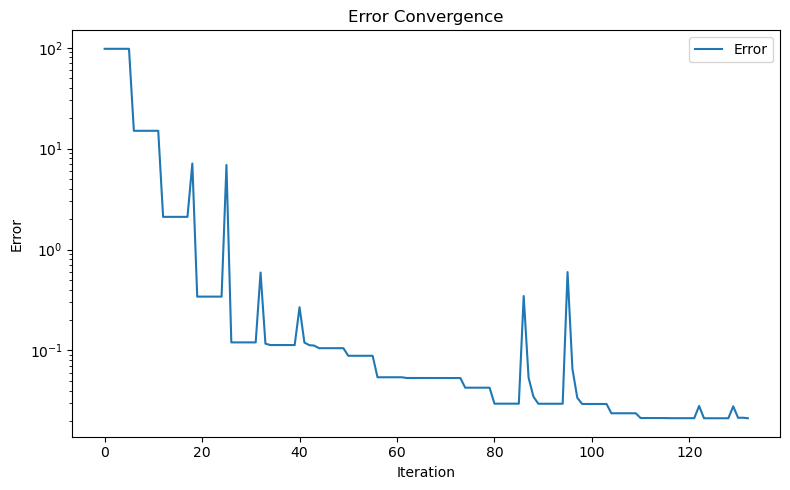

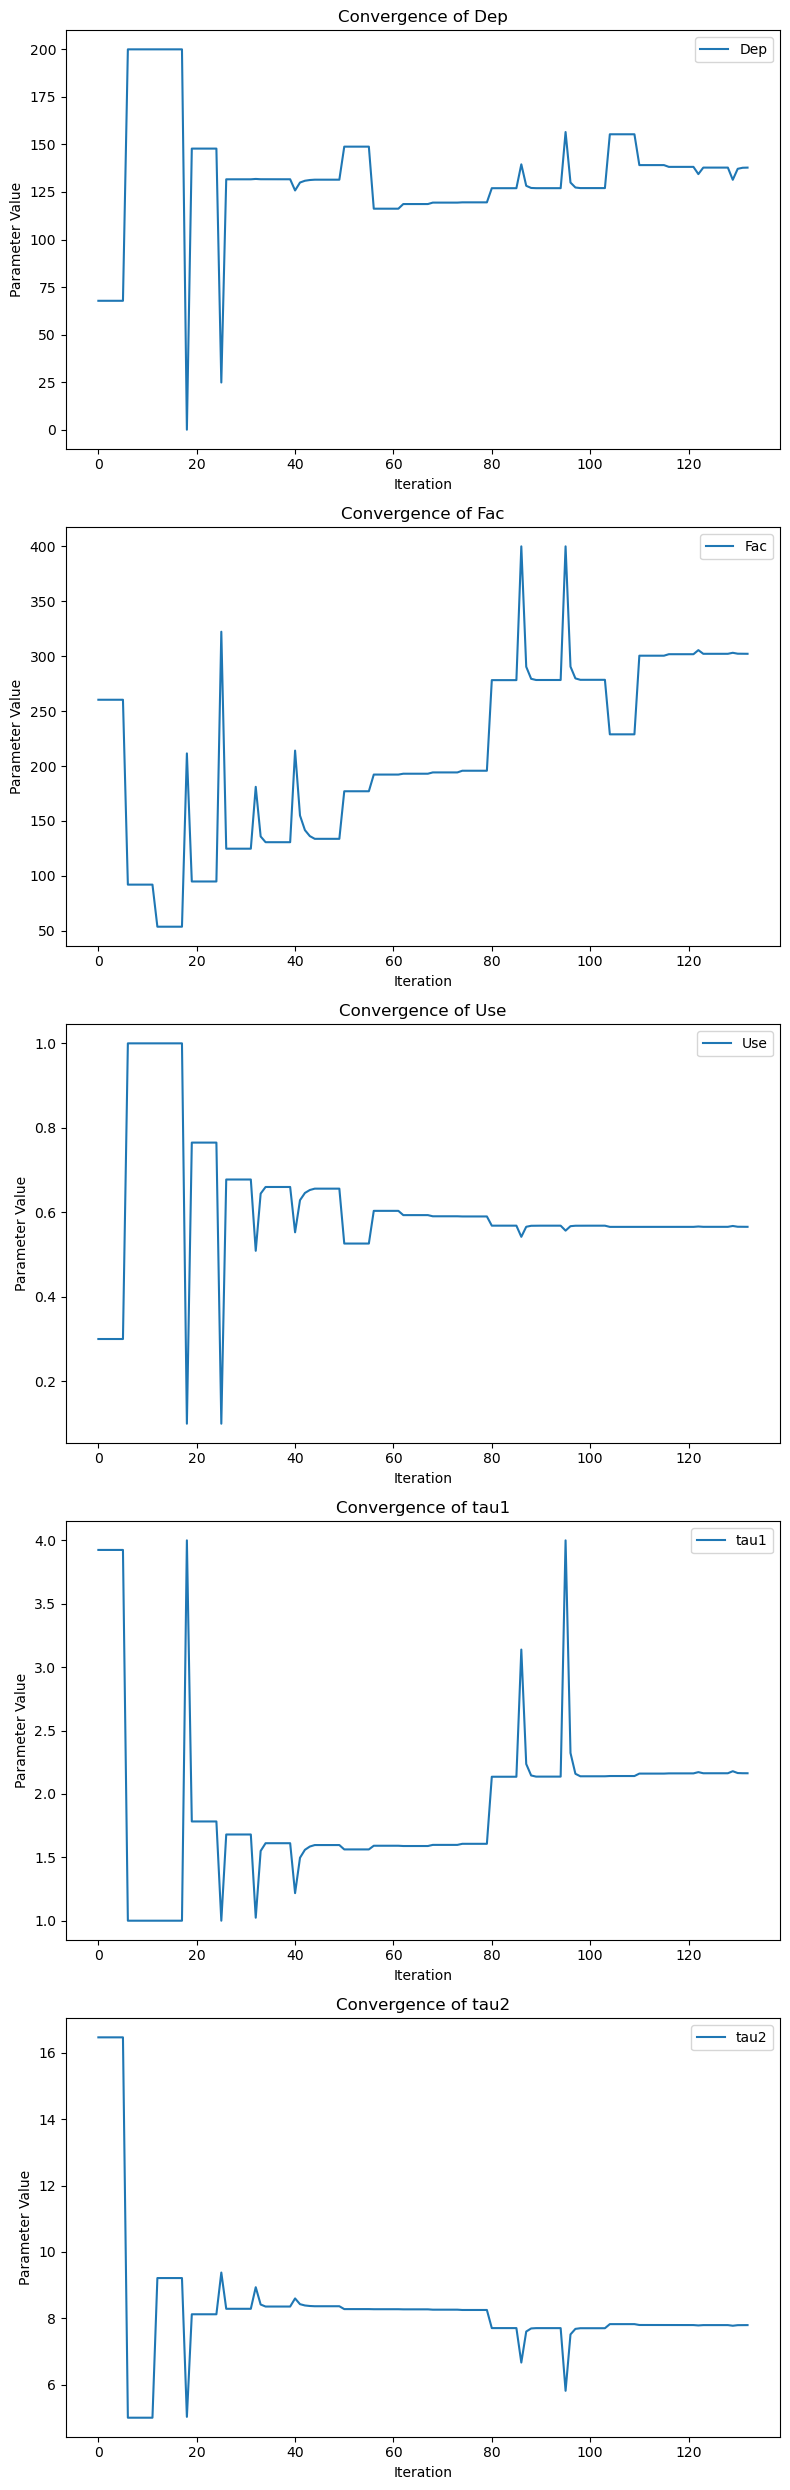

Optimization Results:
Final Error: 2.13e-02

Target Metrics:
induction: -0.747 (target: -0.750)
simple_ppr: 0.826 (target: 0.800)
recovery: -0.059 (target: 0.000)
rise_time: 2.125 (target: 2.000)
decay_time: 8.993 (target: 9.000)

Optimal Parameters:
Dep: 137.814
Fac: 302.192
Use: 0.566
tau1: 2.163
tau2: 7.792


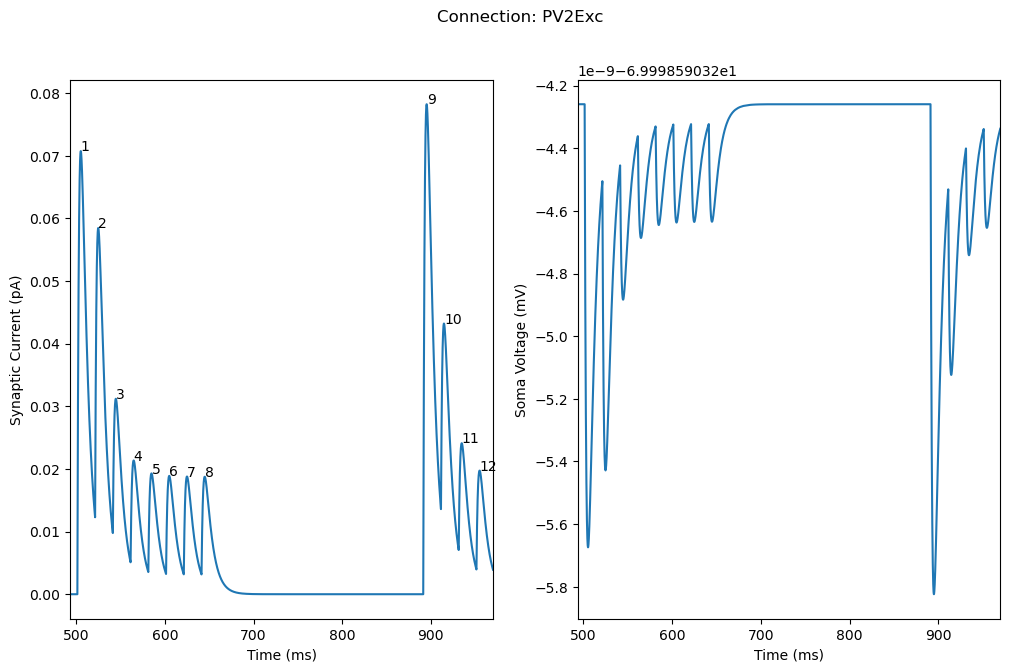


Short Term Plasticity Results for 50Hz with 250 Delay
Simple PPR: Above 1 is facilitating, below 1 is depressing
PPR:        Above 0 is facilitating, below 0 is depressing.
Induction:  Above 0 is facilitating, below 0 is depressing.
Recovery:   A measure of how fast STP decays.

Simple Paired Pulse Ratio (PPR)
    Calculation: Avg 2nd pulse / Avg 1st pulse
    Values: 0.058 / 0.071 = 0.826

Paired Pulse Response (PPR)
    Calculation: (Avg 2nd pulse - Avg 1st pulse) / 90th percentile amplitude
    Values: (0.058 - 0.071) / 0.070 = -0.177

Induction
    Calculation: (Avg(6th, 7th, 8th pulses) - Avg 1st pulse) / 90th percentile amplitude
    Values: 0.019 - 0.071 / 0.070 = -0.747

Recovery
    Calculation: (Avg(9th, 10th, 11th, 12th pulses) - Avg(1st to 4th pulses)) / 90th percentile amplitude
    Values: 0.041 - 0.045 / 0.070 = -0.059




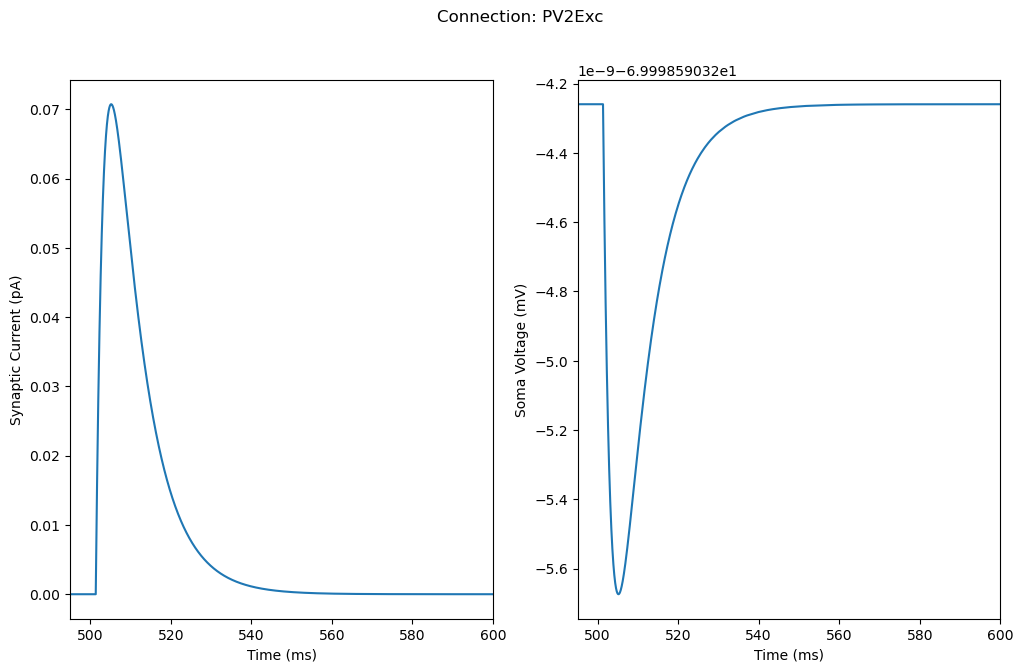

('baseline', 0.0)
('sign', 1.0)
('latency', 1.35)
('amp', 7.073698623809886e-05)
('rise_time', 2.125)
('decay_time', 8.993371099564527)
('half_width', 12.100000000000001)
Current Integral in pA*ms: 0.90


In [ ]:
from bmtool.synapses import SynapseOptimizer

# Create the optimizer
optimizer = SynapseOptimizer(tuner)

# Define parameter bounds these can be any range variable you wish to tune
param_bounds = {
    'Dep': (0, 200.0),
    'Fac': (0, 400.0),
    'Use': (0.1, 1.0),
    'tau1': (1,4), # tau r needs to be less than tau d so be careful
    'tau2': (5,20)
}

# Define target metrics these are the metrics that the tuner will try to automatic get the synapse to respond with
# max amps is an absolute value
target_metrics = {
    'induction': -0.75,
    'simple_ppr': 0.8,
    'recovery': 0.0,
    'rise_time': 2,          # This wont always be the case, but for this synapse Use controls STP and max amps so it can sometimes struggle to fit.
    'decay_time': 9
}

# currently the only metrics in the SynapseOptimizer are 
#            - induction: measure of synaptic facilitation/depression
#            - ppr: paired-pulse ratio
#            - recovery: recovery from facilitation/depression
#            - max_amplitude: maximum synaptic response amplitude
#            - rise_time: time for synaptic response to rise from 20% to 80% of peak
#            - decay_time: time constant of synaptic response decay
#            - latency: synaptic response latency
#            - half_width: synaptic response half-width
#            - baseline: baseline current
#            - amp: peak amplitude from syn_props

def custom_cost(metrics, targets):
    # equal zero unless using train input
    induction_error = (metrics['induction'] - targets['induction']) ** 2
    ppr_error = (metrics['simple_ppr'] - targets['simple_ppr']) ** 2
    recovery_error = (metrics['recovery'] - targets['recovery']) ** 2
    # equal zero unless using SingleEvent
    rise_time_error = (metrics['rise_time'] - targets['rise_time']) ** 2
    decay_time_error = (metrics['decay_time'] - targets['decay_time']) ** 2 

    #return rise_time_error + decay_time_error
    return induction_error + 3 * ppr_error + recovery_error + rise_time_error + decay_time_error #+ 0.5*max_amp_errror

# Run optimization with custom cost function
result = optimizer.optimize_parameters(
    target_metrics=target_metrics,
    param_bounds=param_bounds,
    run_single_event=True,  # Run and use parameters from SingleEvent
    run_train_input=True,   # Run and use parameters from train input 
    train_frequency=50,     # Freq in Hz of train input
    train_delay=250,        # delay in ms of second train
    init_guess='random',    # either random or middle_guess. Random will start the synapse witha random value in the param_bound. Middle guess will pick the middle value in the param_bounds
    cost_function=custom_cost,
    method='SLSQP'          # I believe this will be the fastest method, but you may try others check out https://docs.scipy.org/doc/scipy-1.15.0/reference/generated/scipy.optimize.minimize.html
                            # SLSQP is a gradient based method while nelder-mead is simplex (whatever that means)
)

# Plot results
optimizer.plot_optimization_results(result)